# EE 114 HW 2 Code Solution

Imports and helper functions...

In [2]:
from sympy import *
from sympy.physics.units import *
from spb import *
import numpy as np
from matplotlib import pyplot as plt
import tabulate
from IPython.display import Markdown as md


def simplify(expr):
    return convert_to(expr, [kg, meter, second, K, coulomb]).evalf(50).simplify()

def numint(expr, x, a, b, density=100):
    ld = lambdify(x, simplify(expr), "numpy")
    x = np.linspace(a, b, (b - a) * density)
    y = ld(x)
    return np.trapz(y, x)


Defining the problem and finding the energy graphically:

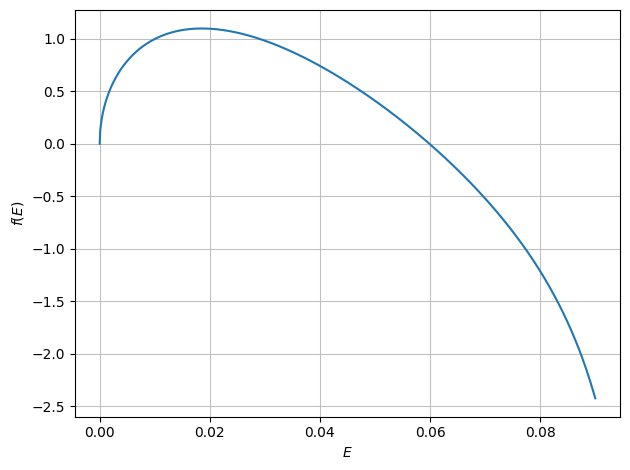

In [16]:
E_eV = symbols('E', real=True)
E = E_eV * eV
m = electron_rest_mass
V = 0.1 * eV
w = 1.8 * nm 

a = sqrt(2 * m * E / hbar**2)
b = sqrt(2 * m * (V - E) / hbar**2)

eq = sin(a*w) + a/b * cos(a*w)

plot(simplify(eq), (E_eV, 0, 0.09))

Now numerically solve the equation. It is close to 0.060 (60 meV).

In [4]:
E_sol = nsolve(simplify(eq), (0.01,0.08))
E_sol

0.0598852936868856

Create a wavefunction using the energy level solution:

In [5]:
x_nm = symbols("x")
x = x_nm * nm

A = -1j # let A be complex so that wavefunction is real
D = A * 2j * sin (a * w) / (exp(-b * w))

wave = Piecewise(
    (0, x_nm < 0),
    (2 * sin(a*x), And(0 <= x_nm, x_nm <= w / nm)),
    (D * exp (-b * x), x_nm > w / nm)
)


Plot the solution:

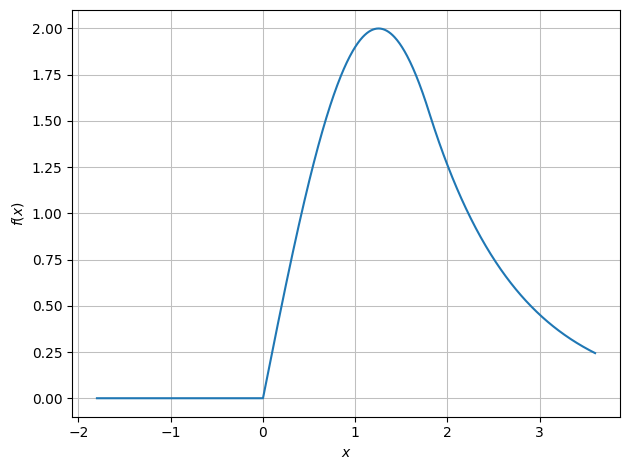

In [6]:
wave_sub = simplify(wave.subs(E_eV, E_sol))
plot(wave_sub, (x_nm, -w/nm, w*2/nm ))

Normalize the wave and show that it is normalized:

In [7]:
wave_sub /= sqrt(numint(wave_sub**2, x_nm, -1, 10))
numint(wave_sub**2, x_nm, -1, 10)

1.0

Find the expected value of the position:

In [8]:
x_bar = numint(x_nm * wave_sub**2, x_nm, -1, 10)
x_bar

1.3872811258539337

Find the expected value of the location. Note the factor of 10^(-31): It is zero.

In [11]:
p_bar = simplify(wave_sub * -1j*hbar * diff(wave_sub, x_nm) / nm)
numint(p_bar, x_nm, -1, 10)

3.59781988663921e-31*I*kilogram*meter/second